Sumber Data : https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset

Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

#Data Understanding

Load Data

In [ ]:
#Helper Fuction
def import_from_gdrive(id_file, file_name):
  link = 'https://drive.google.com/uc?id=' + id_file
  output_file = '/content/' + file_name
  gdown.download(link, output_file, quiet=False)
  df = pd.read_excel(file_name)
  return df

In [ ]:
link_train = '1dNeOuF64rPUxX5kogfRvAmebtxfYyAdV'
link_test = '1aeyW6Q1-od-NUG5eNOeKNGpt2zoRm1d0'
train = import_from_gdrive(link_train,'Data_Train.xlsx')
test = import_from_gdrive(link_test,'Test_set.xlsx')

Downloading...
From: https://drive.google.com/uc?id=1dNeOuF64rPUxX5kogfRvAmebtxfYyAdV
To: /content/Data_Train.xlsx
100%|██████████| 530k/530k [00:00<00:00, 67.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aeyW6Q1-od-NUG5eNOeKNGpt2zoRm1d0
To: /content/Test_set.xlsx
100%|██████████| 121k/121k [00:00<00:00, 37.9MB/s]


In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
#Untuk melihat isinya, gunakan encode diakhir
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
#ubah diakhir menggunakan encode
train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
#ubah diakhir menggunakan encode
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
#Bisa menggunakan encode, Namun terlihat ada yg isinya sama seperti no info, harusnya jdi satu kategori bukan 2, jdi perlu diolah
train.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
#split by space
print(train.Duration.nunique())
train.Duration.unique()

368


array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
print(train.Dep_Time.nunique())
train.Dep_Time.value_counts()

222


18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [ ]:
train.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [ ]:
#Ubah non-stop jadi 0, sisanya ikutin angkanya
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
#karena banyak dan jumlah route nya berbeda-beda, maka lakukan split setiap route dan buat kolom baru, jika tidak ada isi dengan null
print(train.Route.nunique())
train.Route.unique()

128


array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
#karena data berada ditahun 2019 semua, pake cukup split kolom ini menjadi 2 kolom baru yaitu berupa tgl dan bulan (thn tidak usah karena konsisten)
train.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [ ]:
print(train.shape)
print(test.shape)

(10683, 11)
(2671, 10)


In [ ]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#Data Preparation

Check Duplicate

In [ ]:
train.duplicated().sum()

220

In [ ]:
train[train.duplicated()].head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392


In [ ]:
train[(train["Price"]== 3873) & (train["Dep_Time"] == "20:30")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873


In [ ]:
train = train.drop_duplicates(keep='first')

In [ ]:
train.duplicated().sum()

0

Preprocessing

In [ ]:
train[['Day_Journey', 'Month_Journey', 'Year_Journey']] = train['Date_of_Journey'].str.split('/', expand=True).astype(int)
test[['Day_Journey', 'Month_Journey', 'Year_Journey']] = test['Date_of_Journey'].str.split('/', expand=True).astype(int)

In [ ]:
train['Time_Arrival'] = train['Arrival_Time'].str.split(' ').str[0]
test['Time_Arrival'] = test['Arrival_Time'].str.split(' ').str[0]

In [ ]:
train['Arrival_Hour']= train['Time_Arrival'].apply(lambda x:x.split(':')[0])
train['Arrival_Min']= train['Time_Arrival'].apply(lambda x:x.split(':')[1])
train['Arrival_Hour']= train['Arrival_Hour'].astype(int)
train['Arrival_Min']= train['Arrival_Min'].astype(int)

test['Arrival_Hour']= test['Time_Arrival'].apply(lambda x:x.split(':')[0])
test['Arrival_Min']= test['Time_Arrival'].apply(lambda x:x.split(':')[1])
test['Arrival_Hour']= test['Arrival_Hour'].astype(int)
test['Arrival_Min']= test['Arrival_Min'].astype(int)

In [ ]:
def ekstrak_month_arrival(Arrival):
    parts = Arrival.split(" ")

    if len(parts) > 1:
      return parts[-1]
    return np.nan

train['Month_Arrival'] = train['Arrival_Time'].apply(ekstrak_month_arrival)
test['Month_Arrival'] = test['Arrival_Time'].apply(ekstrak_month_arrival)

In [ ]:
def ekstrak_day_arrival(Arrival):
    parts = Arrival.split(" ")

    if len(parts) > 1:
      return parts[1]
    return np.nan

train['Day_Arrival'] = train['Arrival_Time'].apply(ekstrak_day_arrival)
test['Day_Arrival'] = test['Arrival_Time'].apply(ekstrak_day_arrival)

In [ ]:
replacement_stops = {'non-stop': 0,'2 stops': 2,'1 stop': 1,'3 stops': 3,'4 stops': 4}

train['Total_Stops'] = train['Total_Stops'].replace(replacement_stops, regex=True)
test['Total_Stops'] = test['Total_Stops'].replace(replacement_stops, regex=True)

In [ ]:
def waktu_ke_menit(waktu):
    parts = waktu.split()
    total_menit = 0

    for part in parts:
        if 'h' in part:
            total_menit += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_menit += int(part.replace('m', ''))

    return total_menit

train['Duration'] = train['Duration'].apply(waktu_ke_menit)
test['Duration'] = test['Duration'].apply(waktu_ke_menit)

In [ ]:
train['Additional_Info'] = train['Additional_Info'].replace('No info', 'No Info')
test['Additional_Info'] = test['Additional_Info'].replace('No info', 'No Info')

In [ ]:
train['Dep_Hour']= train['Dep_Time'].apply(lambda x:x.split(':')[0])
train['Dep_Min']= train['Dep_Time'].apply(lambda x:x.split(':')[1])
train['Dep_Hour']= train['Dep_Hour'].astype(int)
train['Dep_Min']= train['Dep_Min'].astype(int)

test['Dep_Hour']= test['Dep_Time'].apply(lambda x:x.split(':')[0])
test['Dep_Min']= test['Dep_Time'].apply(lambda x:x.split(':')[1])
test['Dep_Hour']= test['Dep_Hour'].astype(int)
test['Dep_Min']= test['Dep_Min'].astype(int)

In [ ]:
def hitung_jumlah_rute(route):
    if isinstance(route, str):
        return route.count('→') + 1
    return np.nan

train['Route_Count'] = train['Route'].apply(hitung_jumlah_rute)
test['Route_Count'] = test['Route'].apply(hitung_jumlah_rute)

In [ ]:
replacement_Month = {'Mar': 3,'Apr': 4,'May': 5,'Jun': 6}

train['Month_Arrival'] = train['Month_Arrival'].replace(replacement_Month, regex=True)
test['Month_Arrival'] = test['Month_Arrival'].replace(replacement_Month, regex=True)

Missing Value

In [ ]:
train.isnull().sum().sum()

12643

In [ ]:
train.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price                 0
Day_Journey           0
Month_Journey         0
Year_Journey          0
Time_Arrival          0
Arrival_Hour          0
Arrival_Min           0
Month_Arrival      6320
Day_Arrival        6320
Dep_Hour              0
Dep_Min               0
Route_Count           1
dtype: int64

In [ ]:
train['Month_Arrival'] = train.apply(lambda row: row['Month_Journey'] if pd.isna(row['Month_Arrival']) else row['Month_Arrival'], axis=1)
test['Month_Arrival'] = test.apply(lambda row: row['Month_Journey'] if pd.isna(row['Month_Arrival']) else row['Month_Arrival'], axis=1)

train['Day_Arrival'] = train.apply(lambda row: row['Day_Journey'] if pd.isna(row['Day_Arrival']) else row['Day_Arrival'], axis=1)
test['Day_Arrival'] = test.apply(lambda row: row['Day_Journey'] if pd.isna(row['Day_Arrival']) else row['Day_Arrival'], axis=1)

train['Day_Arrival'] = train['Day_Arrival'].astype(int)
test['Day_Arrival'] = test['Day_Arrival'].astype(int)

In [ ]:
train[train["Route_Count"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month_Journey,Year_Journey,Time_Arrival,Arrival_Hour,Arrival_Min,Month_Arrival,Day_Arrival,Dep_Hour,Dep_Min,Route_Count
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,1420,NaN,No Info,...,5,2019,09:25,9,25,5.0,7,9,45,NaN


In [ ]:
train = train.dropna(axis=0)

#EDA

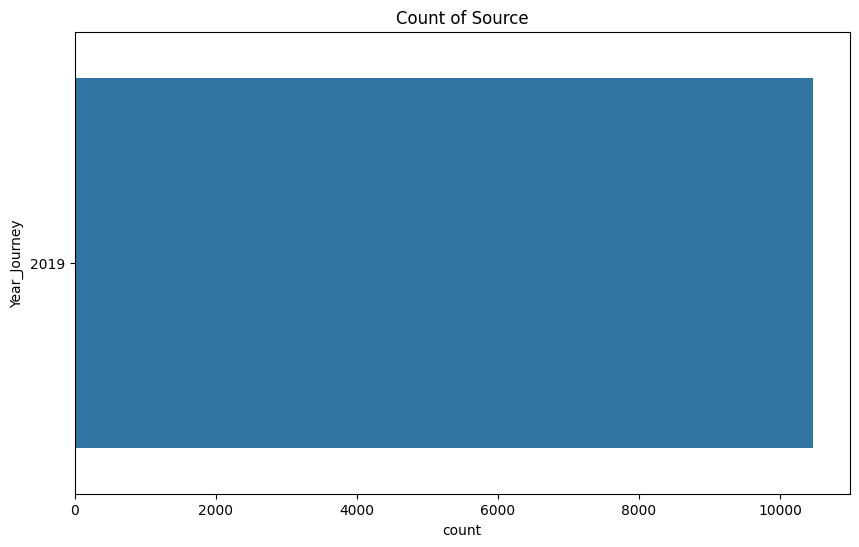

In [ ]:
#Visualisasi Kolom Year_Journey
# Visualisasi ini menunjukkan distribusi jumlah perjalanan berdasarkan tahun.
plt.figure(figsize=(10, 6))
sns.countplot(y='Year_Journey', data=train)
plt.title("Count of Source")
plt.show()

<ipython-input-41-8d876246a847>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


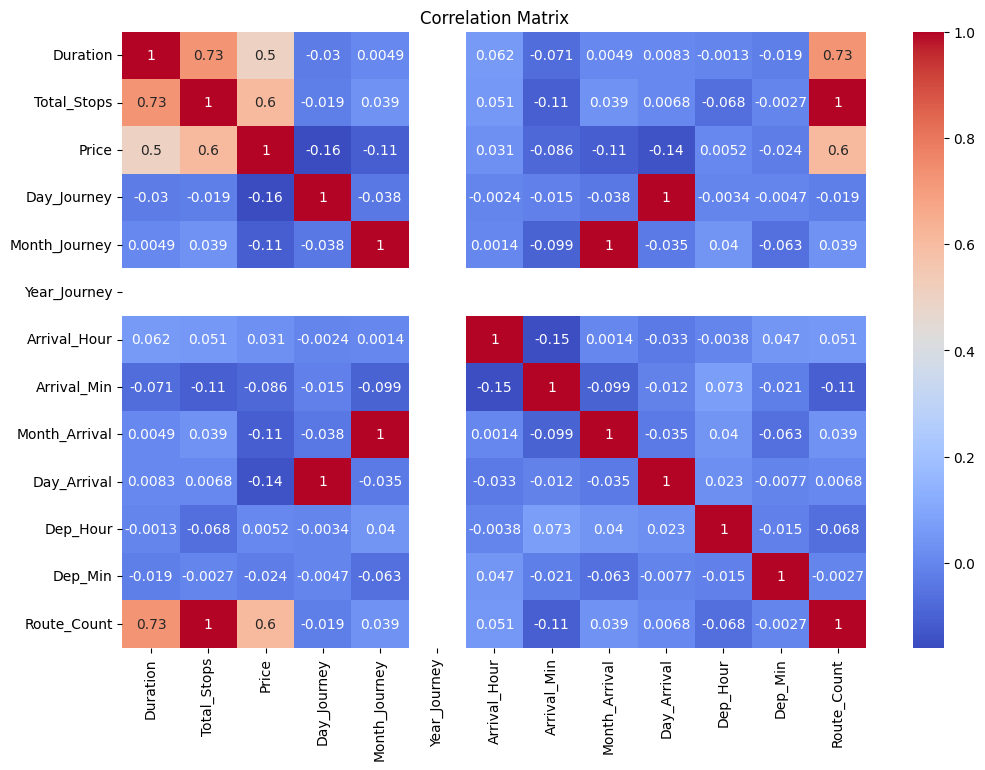

In [ ]:
# Visualisasi Heatmap untuk matriks korelasi
# Heatmap digunakan untuk memvisualisasikan matriks korelasi antara berbagai fitur numerik dalam dataset.
correlation = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

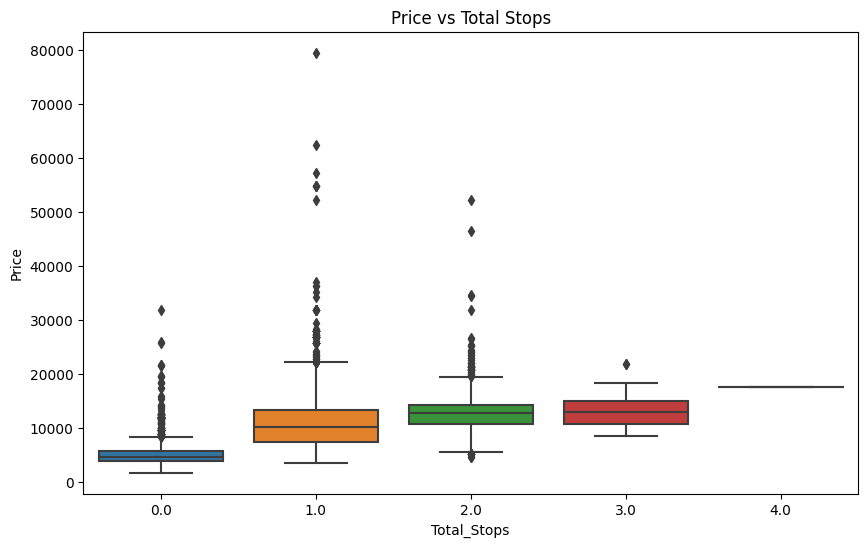

In [ ]:
# Boxplot untuk Price vs Total Stops
# Boxplot ini membandingkan distribusi harga tiket pesawat berdasarkan jumlah total pemberhentian.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=train)
plt.title("Price vs Total Stops")
plt.show()

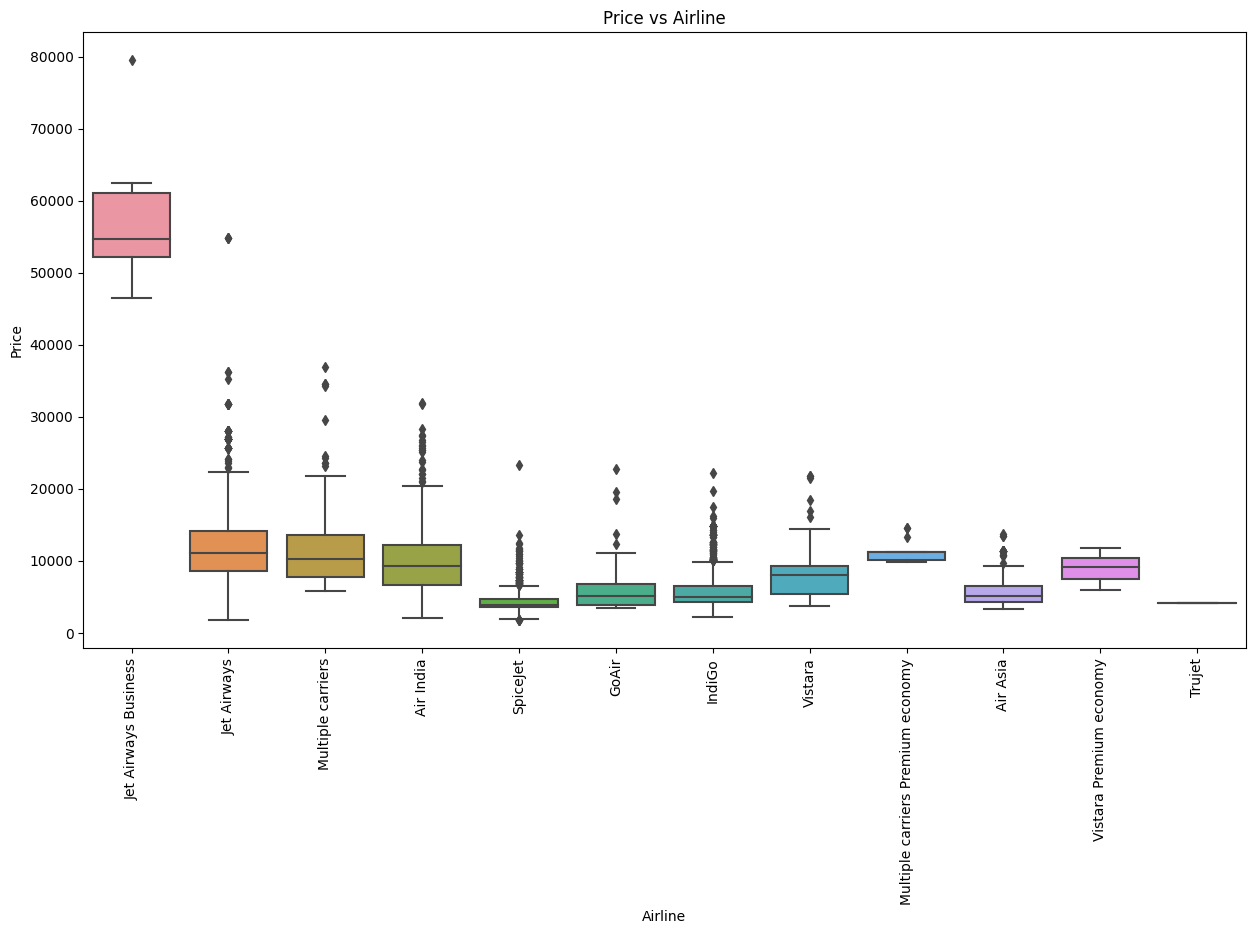

In [ ]:
# Box plot for Price vs Airline
# Boxplot ini membandingkan distribusi harga tiket pesawat berdasarkan maskapai penerbangan.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Airline', y='Price', data=train.sort_values('Price', ascending=False))
plt.title("Price vs Airline")
plt.xticks(rotation=90)
plt.show()


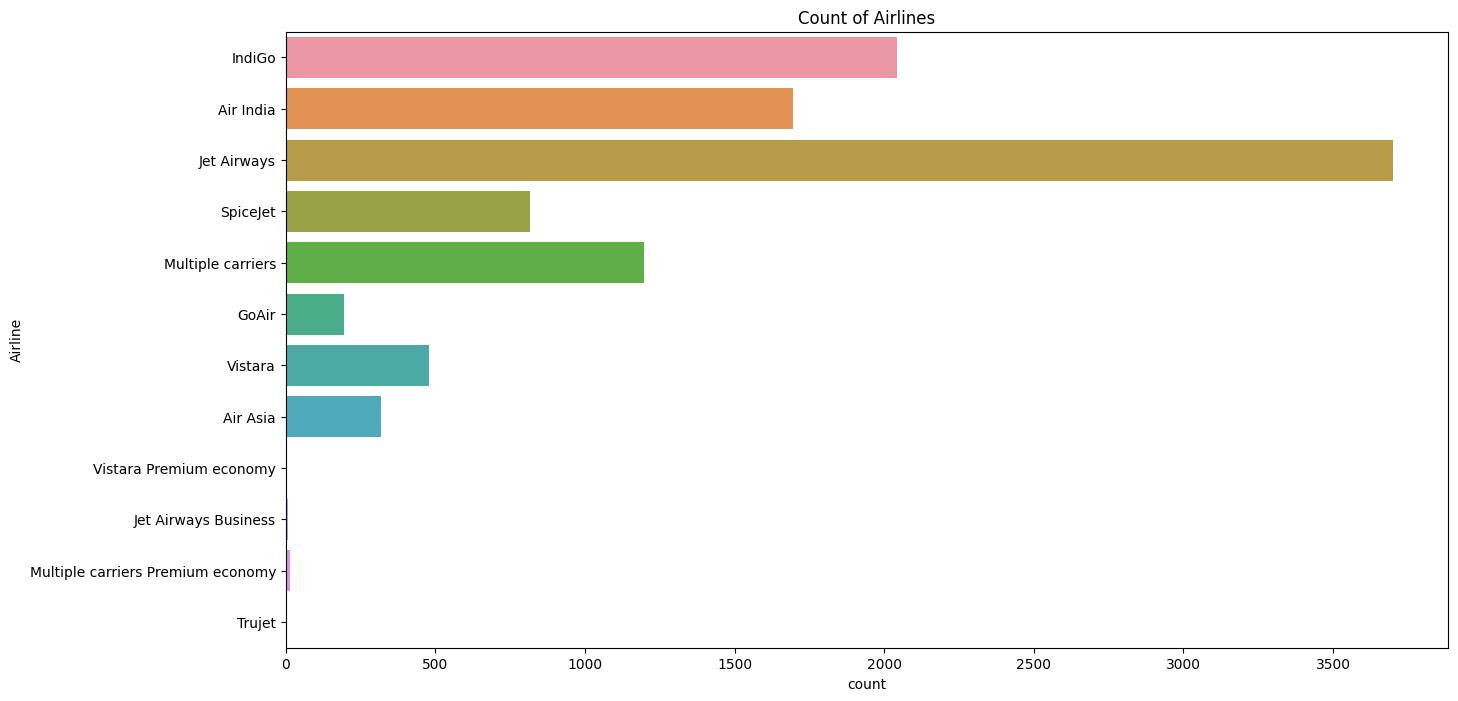

In [ ]:
# Count plot for Airline
# Countplot ini menunjukkan jumlah perjalanan yang dilayani oleh setiap maskapai penerbangan.
plt.figure(figsize=(15, 8))
sns.countplot(y='Airline', data=train)
plt.title("Count of Airlines")
plt.show()

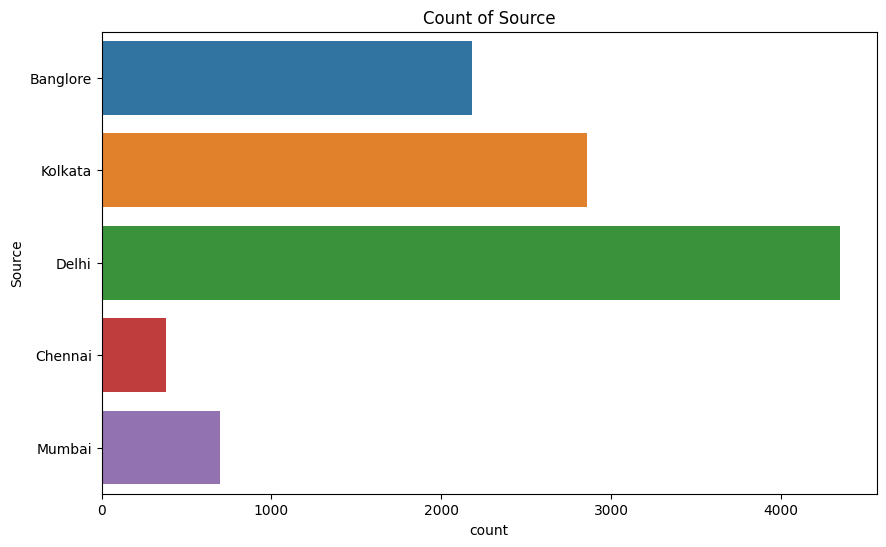

In [ ]:
# Count plot for Source
# Countplot ini menampilkan jumlah perjalanan yang berasal dari masing-masing lokasi keberangkatan.
plt.figure(figsize=(10, 6))
sns.countplot(y='Source', data=train)
plt.title("Count of Source")
plt.show()

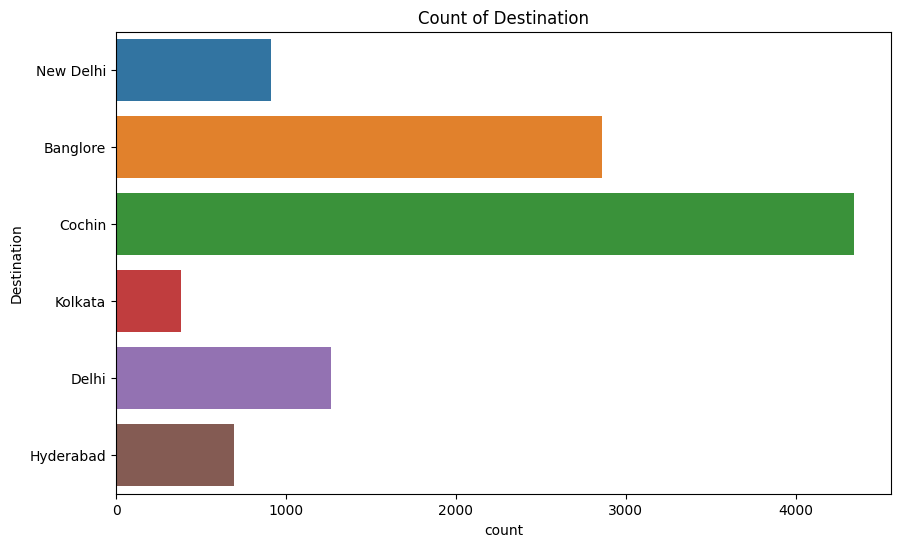

In [ ]:
# Count plot for Destination
# Countplot ini menampilkan jumlah perjalanan yang memiliki tujuan akhir tertentu.
plt.figure(figsize=(10, 6))
sns.countplot(y='Destination', data=train)
plt.title("Count of Destination")
plt.show()

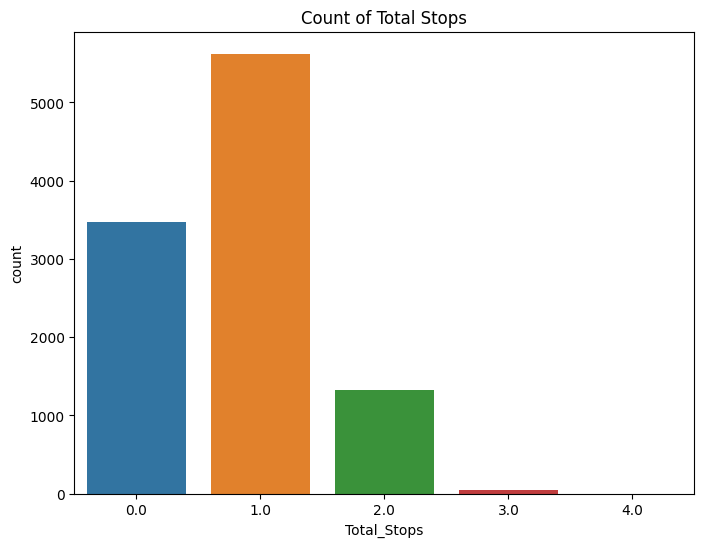

In [ ]:
# Count plot for Total Stops
# Countplot ini menampilkan jumlah perjalanan berdasarkan jumlah total pemberhentian.
plt.figure(figsize=(8, 6))
sns.countplot(x='Total_Stops', data=train)
plt.title("Count of Total Stops")
plt.show()

#Feature Selection

In [ ]:
test.to_csv('test_clean.csv', index=False)

In [ ]:
train = train.drop("Date_of_Journey", axis=1)
test = test.drop("Date_of_Journey", axis=1)

#di drop karena jika dibuat kategori ada kategori yang di data test tetapi tidak masuk ke data train
train = train.drop("Route", axis=1)
test = test.drop("Route", axis=1)

train = train.drop("Dep_Time", axis=1)
test = test.drop("Dep_Time", axis=1)

train = train.drop("Arrival_Time", axis=1)
test = test.drop("Arrival_Time", axis=1)

train = train.drop("Time_Arrival", axis=1)
test = test.drop("Time_Arrival", axis=1)

In [ ]:
#Karena konsisten
train = train.drop("Year_Journey", axis=1)
test = test.drop("Year_Journey", axis=1)

#Korelasinya sama
train = train.drop("Month_Journey", axis=1)
test = test.drop("Month_Journey", axis=1)

train = train.drop("Day_Journey", axis=1)
test = test.drop("Day_Journey", axis=1)

train = train.drop("Total_Stops", axis=1)
test = test.drop("Total_Stops", axis=1)

In [ ]:
#Kolom terpilih
train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info',
       'Price', 'Arrival_Hour', 'Arrival_Min', 'Month_Arrival', 'Day_Arrival',
       'Dep_Hour', 'Dep_Min', 'Route_Count'],
      dtype='object')

In [ ]:
# correlation_matrix = train.corr()
# rerata_kecepatan_correlation = correlation_matrix['Price']
# sorted_correlation = rerata_kecepatan_correlation.abs().sort_values(ascending=False)

# print(sorted_correlation)

#Feature Engeenering

In [ ]:
print(train['Airline'].nunique(), test['Airline'].nunique())
print(train['Source'].nunique(), test['Source'].nunique())
print(train['Destination'].nunique(), test['Destination'].nunique())
print(train['Additional_Info'].nunique(), test['Additional_Info'].nunique())

12 11
5 5
6 6
9 6


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# columns_to_encode = ['Airline', 'Source', 'Destination', 'Additional_Info']
columns_to_encode = ['Airline', 'Additional_Info']

encoder = OrdinalEncoder()
encoder.fit(train[columns_to_encode])

train_encoded = encoder.transform(train[columns_to_encode])
test_encoded = encoder.transform(test[columns_to_encode])

train[columns_to_encode] = train_encoded
test[columns_to_encode] = test_encoded

In [ ]:
train =pd.get_dummies(train)
test =pd.get_dummies(test)

In [ ]:
train.head(3)

,Airline,Duration,Additional_Info,Price,Arrival_Hour,Arrival_Min,Month_Arrival,Day_Arrival,Dep_Hour,Dep_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3.0,170,6.0,3897,1,10,3.0,22,22,20,...,0,0,0,0,0,0,0,0,0,1
1,1.0,445,6.0,7662,13,15,5.0,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,4.0,1140,6.0,13882,4,25,6.0,10,9,25,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
test.head(3)

,Airline,Duration,Additional_Info,Arrival_Hour,Arrival_Min,Month_Arrival,Day_Arrival,Dep_Hour,Dep_Min,Route_Count,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4.0,655,6.0,4,25,6.0,7,17,30,3,...,0,1,0,0,0,1,0,0,0,0
1,3.0,240,6.0,10,20,5.0,12,6,20,3,...,0,0,1,0,1,0,0,0,0,0
2,4.0,1425,5.0,19,0,5.0,22,19,15,3,...,0,1,0,0,0,1,0,0,0,0


#Pemodelan & Evaluation

In [ ]:
# Memisahkan fitur dan target
X = train.drop("Price", axis=1)
y = train["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
#Menggunakan train_test_splituntuk membagi data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
# Skala fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


##KNN

In [ ]:
# Model training
#menggunakan K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# Predictions on validation set
y_pred = knn_regressor.predict(X_val_scaled)

In [ ]:
# Evaluation metrics
# Menghitung beberapa metrik evaluasi seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan R-squared (R^2).
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4927307.0599139985
Root Mean Squared Error: 2219.7538286742515
Mean Absolute Error: 1159.097563306259
R-squared: 0.7636814509981861


In [ ]:
y_pred = knn_regressor.predict(X_train_scaled)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3043855.8309332062
Root Mean Squared Error: 1744.664962373351
Mean Absolute Error: 918.2823037399929
R-squared: 0.8585461385203994


##XGB

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_val)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print("MAE:", mae_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)
print("R2 Score: ",r2_xgb)

MAE: 745.107532572302
R2 Score:  0.8918691063629093


In [ ]:
y_pred_xgb = model.predict(X_train)

mae_xgb = mean_absolute_error(y_train, y_pred_xgb)
print("MAE:", mae_xgb)
r2_xgb = r2_score(y_train, y_pred_xgb)
print("R2 Score: ",r2_xgb)

MAE: 460.518369620213
R2 Score:  0.9753602700015263


#Predikstion Test Data

In [ ]:
# Making predictions on the test set
y_test_pred = model.predict(test)

In [ ]:

# Creating a DataFrame to store the test predictions
test_predictions = pd.DataFrame({'Predicted_Price': y_test_pred})

In [ ]:
# Saving the test predictions to a CSV file
test_predictions.to_csv('test_predictions.csv', index=False)

In [ ]:
test_merge = pd.concat([test, test_predictions['Predicted_Price']], axis=1)
test_merge.head()

,Airline,Duration,Additional_Info,Arrival_Hour,Arrival_Min,Month_Arrival,Day_Arrival,Dep_Hour,Dep_Min,Route_Count,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Predicted_Price
0,4.0,655,6.0,4,25,6.0,7,17,30,3,...,1,0,0,0,1,0,0,0,0,14237.485352
1,3.0,240,6.0,10,20,5.0,12,6,20,3,...,0,1,0,1,0,0,0,0,0,4417.717285
2,4.0,1425,5.0,19,0,5.0,22,19,15,3,...,1,0,0,0,1,0,0,0,0,12564.377930
3,6.0,780,6.0,21,0,5.0,21,8,0,3,...,1,0,0,0,1,0,0,0,0,11148.213867
4,0.0,170,6.0,2,45,6.0,25,23,55,2,...,0,0,0,0,0,1,0,0,0,3613.302979
